<a href="https://colab.research.google.com/github/KarolMc/msc_dissertation/blob/main/model_selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import joblib

import pandas as pd
import numpy as np

# Import SVC from sklearn.svm and accuracy_score from sklearn.metrics
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split, StratifiedKFold

from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier

from sklearn.pipeline import Pipeline

from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import make_scorer

import random

random_seed = random.seed(42)

from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import accuracy_score, confusion_matrix

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt

## import data


In [ ]:
X_train = pd.read_csv('/notebooks/Data/multiselected_data/X_train_multiselected.csv', index_col=[0])
y_train = pd.read_csv('/notebooks/Data/y_train_SMOV.csv', index_col=[0])
X_test = pd.read_csv('/notebooks/Data/multiselected_data/X_test_multiselected.csv', index_col=[0])
y_test = pd.read_csv('/notebooks/Data/y_test.csv', index_col=[0])

train_features = X_train.columns

In [ ]:
X_train.head()

,Uric_acid_umol_L,Blood_urea_nitrogen_mmol_L,Direct_HDL_Cholesterol_mmol_l,Body_Mass_Index_kg_m2,Triglycerides_refrig_serum_mmol_L,Globulin_g_L,Blood_Cadmium_umol_l,Age_Years,Triglyceride_mmol_l,Gamma_Glutamyl_Transferase_U_l,...,Upper_Arm_Length_cm,Race_Mexican_American,HSV1_positive,ChildEd_5thGrade_or_lower,BPCuff_Child,Weight_kg,BMI_unknown,Household_income_75-100k,ChildEd_None_KG,ChildEd_6th_to_9thGrade
0,315.2,4.28,51.0,19.7,1.264,28.0,5.87,57.0,1.073,18.0,...,35.0,0,0,0,0,50.5,0,0,0,0
1,315.2,4.28,89.0,16.3,1.264,28.0,0.00,8.0,1.073,18.0,...,26.9,0,0,1,1,29.4,0,0,0,0
2,315.2,4.28,39.0,30.1,1.660,30.0,1.96,43.0,1.569,25.0,...,35.0,0,1,0,0,71.0,0,0,0,0
3,315.2,4.28,51.0,25.0,1.264,28.0,1.96,0.0,1.073,18.0,...,35.5,1,0,0,0,5.1,1,0,0,0
4,428.3,3.57,47.0,31.1,1.569,23.0,4.89,47.0,1.558,20.0,...,39.8,0,1,0,0,105.3,0,0,0,0


In [ ]:
X_test.head()

,Uric_acid_umol_L,Blood_urea_nitrogen_mmol_L,Direct_HDL_Cholesterol_mmol_l,Body_Mass_Index_kg_m2,Triglycerides_refrig_serum_mmol_L,Globulin_g_L,Blood_Cadmium_umol_l,Age_Years,Triglyceride_mmol_l,Gamma_Glutamyl_Transferase_U_l,...,Upper_Arm_Length_cm,Race_Mexican_American,HSV1_positive,ChildEd_5thGrade_or_lower,BPCuff_Child,Weight_kg,BMI_unknown,Household_income_75-100k,ChildEd_None_KG,ChildEd_6th_to_9thGrade
12896,416.4,5.71,57.0,26.35,4.189,30.0,3.02,28.0,1.073,130.0,...,40.0,0,1,0,0,77.4,0,0,0,0
15792,315.2,4.28,51.0,15.72,1.264,28.0,0.00,2.0,1.073,18.0,...,18.0,1,0,0,0,12.2,0,0,0,0
21975,315.2,4.28,51.0,19.00,1.264,28.0,1.96,11.0,1.073,18.0,...,31.1,0,0,1,0,41.4,0,0,0,0
47491,345.0,13.57,31.0,35.80,3.048,25.0,2.85,79.0,1.073,19.0,...,39.6,0,0,0,0,103.8,0,0,0,0
43345,333.1,3.57,37.0,35.10,3.545,35.0,1.96,20.0,1.073,17.0,...,40.0,1,0,0,0,121.2,0,0,0,0


In [ ]:
y_train = y_train.rename({'0': 'Diabetes_status'}, axis = 1)
y_train.head()

,Diabetes_status
0,0
1,0
2,1
3,0
4,0


In [ ]:

y_train.value_counts()


Diabetes_status
0                  25288
1                  25288
2                  25288
dtype: int64

In [ ]:
import random

random_seed = random.seed(42)

## standardising


In [ ]:
scaler = StandardScaler()

X_train_std = scaler.fit_transform(X_train)

X_train_std = pd.DataFrame(X_train_std, columns = X_train.columns)

In [ ]:
# check for NaN

X_train_std_nan = X_train_std.columns[X_train_std.isna().any()].tolist()

In [ ]:
X_train_std_nan

[]

In [ ]:
X_test_std = scaler.fit_transform(X_test)


X_test_std = pd.DataFrame(X_test_std, columns = X_test.columns)

## Model comparison


In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 21.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.2/15.2 MB 24.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.0/47.0 kB 14.3 MB/s eta 0:00:00


In [ ]:
!pip install lightgbm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 46.1 MB/s eta 0:00:0000:01


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import svm, tree
import xgboost
import catboost
import lightgbm
from sklearn.neural_network import MLPClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
classifiers = []

In [ ]:

model1 = tree.DecisionTreeClassifier()
classifiers.append(model1)
model2 = RandomForestClassifier(max_depth=25, min_samples_leaf=2, min_samples_split=10,
                       n_estimators=500, random_state=random_seed)
classifiers.append(model2)
model3 = svm.SVC(decision_function_shape='ovo')
classifiers.append(model3)
model4 = svm.LinearSVC()
classifiers.append(model4)
model5 = MLPClassifier(solver='sgd', alpha=1e-5, hidden_layer_sizes=(10, 3), random_state=random_seed)
classifiers.append(model5)
model6 = OneVsRestClassifier(MLPClassifier(solver='sgd', alpha=1e-5, hidden_layer_sizes=(10, 3), random_state=random_seed))
classifiers.append(model6)


model7 = xgboost.XGBClassifier()
classifiers.append(model7)
model8 = catboost.CatBoostClassifier(random_seed = random_seed)
classifiers.append(model8)
model9 = lightgbm.LGBMClassifier()
classifiers.append(model9)

Accuracy of DecisionTreeClassifier() is 0.26178354409591065
Confusion Matrix of DecisionTreeClassifier() is [[1010 5460 1926]
 [ 211 1390 1127]
 [  42  224  788]]
              precision    recall  f1-score   support

     class 0       0.80      0.12      0.21      8396
     class 1       0.20      0.51      0.28      2728
     class 2       0.21      0.75      0.32      1054

    accuracy                           0.26     12178
   macro avg       0.40      0.46      0.27     12178
weighted avg       0.61      0.26      0.24     12178



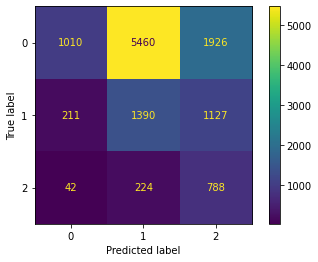

/tmp/ipykernel_59/159215940.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train_std, y_train)


Accuracy of RandomForestClassifier(max_depth=25, min_samples_leaf=2, min_samples_split=10,
                       n_estimators=500) is 0.21908359336508457
Confusion Matrix of RandomForestClassifier(max_depth=25, min_samples_leaf=2, min_samples_split=10,
                       n_estimators=500) is [[  32 7693  671]
 [   4 1731  993]
 [   0  149  905]]
              precision    recall  f1-score   support

     class 0       0.89      0.00      0.01      8396
     class 1       0.18      0.63      0.28      2728
     class 2       0.35      0.86      0.50      1054

    accuracy                           0.22     12178
   macro avg       0.47      0.50      0.26     12178
weighted avg       0.68      0.22      0.11     12178



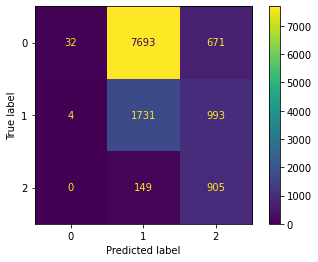

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy of SVC(decision_function_shape='ovo') is 0.6305633108884874
Confusion Matrix of SVC(decision_function_shape='ovo') is [[5182 2655  559]
 [ 239 1634  855]
 [  37  154  863]]
              precision    recall  f1-score   support

     class 0       0.95      0.62      0.75      8396
     class 1       0.37      0.60      0.46      2728
     class 2       0.38      0.82      0.52      1054

    accuracy                           0.63     12178
   macro avg       0.57      0.68      0.57     12178
weighted avg       0.77      0.63      0.66     12178



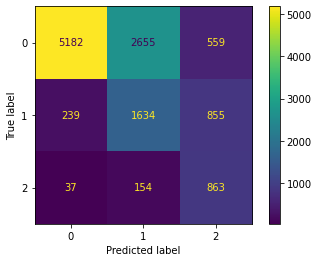

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy of LinearSVC() is 0.5874527837083265
Confusion Matrix of LinearSVC() is [[4823 2593  980]
 [ 188 1352 1188]
 [   3   72  979]]
              precision    recall  f1-score   support

     class 0       0.96      0.57      0.72      8396
     class 1       0.34      0.50      0.40      2728
     class 2       0.31      0.93      0.47      1054

    accuracy                           0.59     12178
   macro avg       0.54      0.67      0.53     12178
weighted avg       0.77      0.59      0.63     12178



/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


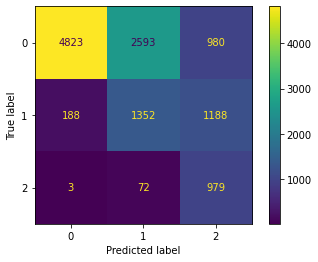

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1118: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy of MLPClassifier(alpha=1e-05, hidden_layer_sizes=(10, 3), solver='sgd') is 0.5629824273279684
Confusion Matrix of MLPClassifier(alpha=1e-05, hidden_layer_sizes=(10, 3), solver='sgd') is [[4481 3022  893]
 [ 115 1400 1213]
 [   7   72  975]]
              precision    recall  f1-score   support

     class 0       0.97      0.53      0.69      8396
     class 1       0.31      0.51      0.39      2728
     class 2       0.32      0.93      0.47      1054

    accuracy                           0.56     12178
   macro avg       0.53      0.66      0.52     12178
weighted avg       0.77      0.56      0.60     12178



/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


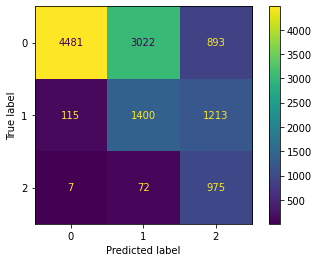

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy of OneVsRestClassifier(estimator=MLPClassifier(alpha=1e-05,
                                            hidden_layer_sizes=(10, 3),
                                            solver='sgd')) is 0.5729183774018722
Confusion Matrix of OneVsRestClassifier(estimator=MLPClassifier(alpha=1e-05,
                                            hidden_layer_sizes=(10, 3),
                                            solver='sgd')) is [[4606 2891  899]
 [ 118 1407 1203]
 [   7   83  964]]
              precision    recall  f1-score   support

     class 0       0.97      0.55      0.70      8396
     class 1       0.32      0.52      0.40      2728
     class 2       0.31      0.91      0.47      1054

    accuracy                           0.57     12178
   macro avg       0.54      0.66      0.52     12178
weighted avg       0.77      0.57      0.61     12178



/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


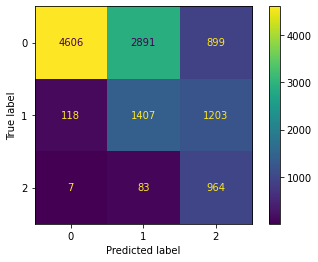

Accuracy of XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...) is 0.21111841024798816
Confusion Matrix of XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric

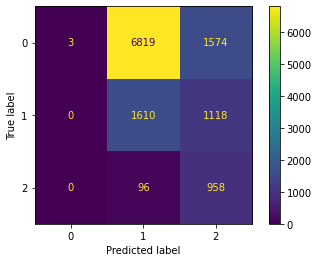

Learning rate set to 0.098675
0:	learn: 1.0303141	total: 25.1ms	remaining: 25.1s
1:	learn: 0.9738101	total: 47.4ms	remaining: 23.7s
2:	learn: 0.9276933	total: 66.3ms	remaining: 22s
3:	learn: 0.8865217	total: 86ms	remaining: 21.4s
4:	learn: 0.8511222	total: 106ms	remaining: 21.1s
5:	learn: 0.8204551	total: 125ms	remaining: 20.8s
6:	learn: 0.7955438	total: 148ms	remaining: 21s
7:	learn: 0.7723403	total: 174ms	remaining: 21.6s
8:	learn: 0.7500395	total: 196ms	remaining: 21.6s
9:	learn: 0.7306537	total: 221ms	remaining: 21.8s
10:	learn: 0.7130785	total: 241ms	remaining: 21.6s
11:	learn: 0.6986097	total: 260ms	remaining: 21.4s
12:	learn: 0.6829371	total: 280ms	remaining: 21.3s
13:	learn: 0.6705456	total: 297ms	remaining: 20.9s
14:	learn: 0.6600537	total: 317ms	remaining: 20.8s
15:	learn: 0.6502400	total: 336ms	remaining: 20.6s
16:	learn: 0.6403650	total: 354ms	remaining: 20.5s
17:	learn: 0.6327580	total: 375ms	remaining: 20.4s
18:	learn: 0.6235825	total: 394ms	remaining: 20.3s
19:	learn: 0.

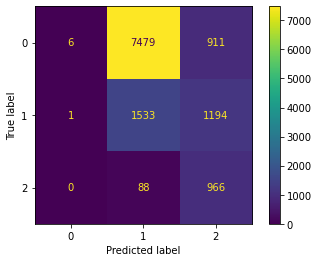

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy of LGBMClassifier() is 0.20972245032024964
Confusion Matrix of LGBMClassifier() is [[   1 7310 1085]
 [   0 1583 1145]
 [   0   84  970]]
              precision    recall  f1-score   support

     class 0       1.00      0.00      0.00      8396
     class 1       0.18      0.58      0.27      2728
     class 2       0.30      0.92      0.46      1054

    accuracy                           0.21     12178
   macro avg       0.49      0.50      0.24     12178
weighted avg       0.76      0.21      0.10     12178



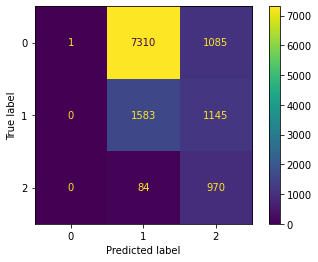

In [ ]:
for clf in classifiers:
    clf.fit(X_train_std, y_train)
    y_pred= clf.predict(X_test_std)
    acc = accuracy_score(y_test, y_pred)
    print("Accuracy of %s is %s"%(clf, acc))
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix of %s is %s"%(clf, cm))
    target_names = ['class 0', 'class 1', 'class 2']
    print(classification_report(y_test, y_pred, target_names=target_names))
    cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_).plot()
    plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt

Accuracy of DecisionTreeClassifier() is 0.7235178190179011
              precision    recall  f1-score   support

     class 1       0.86      0.82      0.84      8396
     class 2       0.46      0.49      0.47      2728
     class 3       0.47      0.55      0.51      1054

    accuracy                           0.72     12178
   macro avg       0.60      0.62      0.61     12178
weighted avg       0.74      0.72      0.73     12178



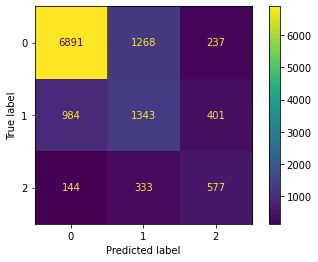

/tmp/ipykernel_59/4137708951.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Accuracy of RandomForestClassifier(max_depth=25, min_samples_leaf=2, min_samples_split=10,
                       n_estimators=500) is 0.7722121859090163
              precision    recall  f1-score   support

     class 1       0.91      0.83      0.87      8396
     class 2       0.51      0.67      0.58      2728
     class 3       0.62      0.57      0.60      1054

    accuracy                           0.77     12178
   macro avg       0.68      0.69      0.68     12178
weighted avg       0.80      0.77      0.78     12178



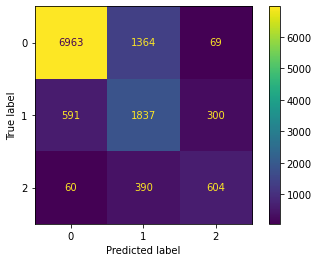

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy of SVC(decision_function_shape='ovo') is 0.5715224174741337
              precision    recall  f1-score   support

     class 1       0.89      0.59      0.71      8396
     class 2       0.32      0.53      0.40      2728
     class 3       0.26      0.50      0.35      1054

    accuracy                           0.57     12178
   macro avg       0.49      0.54      0.48     12178
weighted avg       0.70      0.57      0.61     12178



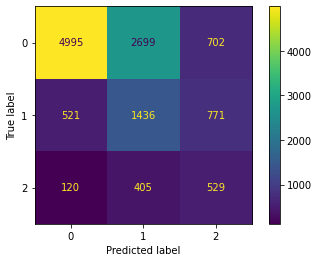

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy of LinearSVC() is 0.7518475940220068
              precision    recall  f1-score   support

     class 1       0.82      0.89      0.85      8396
     class 2       0.51      0.43      0.47      2728
     class 3       0.71      0.48      0.57      1054

    accuracy                           0.75     12178
   macro avg       0.68      0.60      0.63     12178
weighted avg       0.74      0.75      0.74     12178



/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


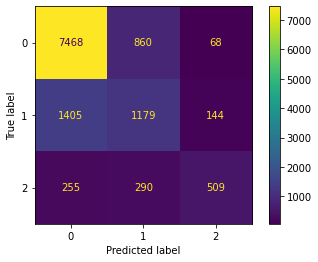

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1118: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy of MLPClassifier(alpha=1e-05, hidden_layer_sizes=(10, 3), solver='sgd') is 0.08654951551978979
              precision    recall  f1-score   support

     class 1       0.00      0.00      0.00      8396
     class 2       0.00      0.00      0.00      2728
     class 3       0.09      1.00      0.16      1054

    accuracy                           0.09     12178
   macro avg       0.03      0.33      0.05     12178
weighted avg       0.01      0.09      0.01     12178



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


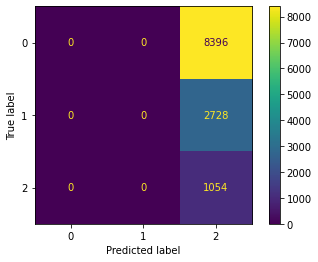

Accuracy of OneVsRestClassifier(estimator=MLPClassifier(alpha=1e-05,
                                            hidden_layer_sizes=(10, 3),
                                            solver='sgd')) is 0.22409262604696994
              precision    recall  f1-score   support

     class 1       0.50      0.00      0.00      8396
     class 2       0.22      1.00      0.37      2728
     class 3       0.00      0.00      0.00      1054

    accuracy                           0.22     12178
   macro avg       0.24      0.33      0.12     12178
weighted avg       0.39      0.22      0.08     12178



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


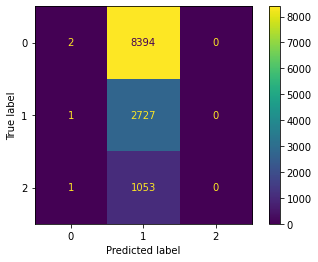

Accuracy of XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...) is 0.8022663820003285
              precision    recall  f1-score   support

     class 1       0.88      0.90      0.89      8396
     class 2       0.58      0.58      0.58      2728
     class 3       0.73      0.63      0.68      1054

    accuracy                       

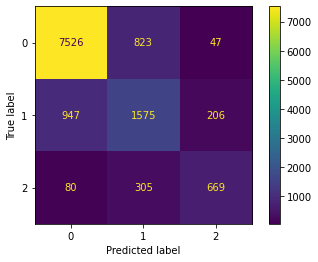

Learning rate set to 0.098675
0:	learn: 1.0303141	total: 26.9ms	remaining: 26.9s
1:	learn: 0.9719733	total: 51.4ms	remaining: 25.6s
2:	learn: 0.9260363	total: 70.9ms	remaining: 23.6s
3:	learn: 0.8866924	total: 89.8ms	remaining: 22.4s
4:	learn: 0.8513518	total: 110ms	remaining: 21.8s
5:	learn: 0.8199704	total: 129ms	remaining: 21.4s
6:	learn: 0.7941846	total: 148ms	remaining: 21s
7:	learn: 0.7727951	total: 167ms	remaining: 20.7s
8:	learn: 0.7540827	total: 186ms	remaining: 20.5s
9:	learn: 0.7338599	total: 206ms	remaining: 20.4s
10:	learn: 0.7165211	total: 232ms	remaining: 20.9s
11:	learn: 0.6993220	total: 251ms	remaining: 20.7s
12:	learn: 0.6858539	total: 268ms	remaining: 20.4s
13:	learn: 0.6730847	total: 287ms	remaining: 20.2s
14:	learn: 0.6623148	total: 306ms	remaining: 20.1s
15:	learn: 0.6521950	total: 327ms	remaining: 20.1s
16:	learn: 0.6422809	total: 347ms	remaining: 20.1s
17:	learn: 0.6336085	total: 367ms	remaining: 20s
18:	learn: 0.6243977	total: 385ms	remaining: 19.9s
19:	learn: 

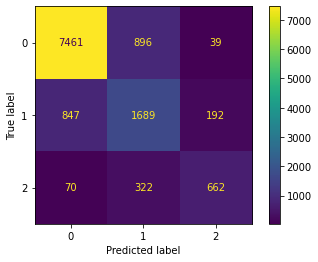

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy of LGBMClassifier() is 0.8042371489571358
              precision    recall  f1-score   support

     class 1       0.88      0.90      0.89      8396
     class 2       0.59      0.58      0.58      2728
     class 3       0.72      0.64      0.68      1054

    accuracy                           0.80     12178
   macro avg       0.73      0.71      0.72     12178
weighted avg       0.80      0.80      0.80     12178



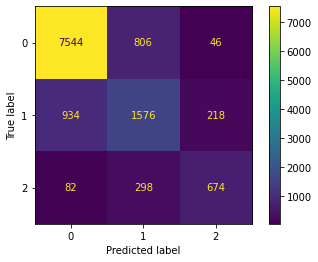

In [ ]:
for clf in classifiers:
    clf.fit(X_train, y_train)
    y_pred= clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print("Accuracy of %s is %s"%(clf, acc))
    target_names = ['class 1', 'class 2', 'class 3']
    print(classification_report(y_test, y_pred, target_names=target_names))
    cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_).plot()
    plt.show()